In [1]:
from importlib import reload
import dataset
import numpy as np
reload(dataset)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
dset = dataset.EarthquakeDataset(folder='../data/trigger/prepared/', 
                                 length=50000,
                                 transforms='bandpass:whiten', 
                                 split='SAC_20100227_Chile_prem')

In [3]:
siamese = dataset.SiameseDataset(dset)

In [12]:
siamese[0]

{'data': array([[ 1.48825614e+00, -1.06319817e-01, -1.41816100e+00, ...,
         -1.08500880e-05, -1.08500880e-05, -1.08500880e-05],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
 'label': array([[1., 0.],
        [0., 1.]]),
 'weight': array([[1.],
        [1.]])}

In [3]:
import pickle
with open('../data/trigger/prepared/negative_SAC_20100227_Chile_prem_TA.035A.BHN.SAC.p', 'rb') as f:
    x = pickle.load(f)

In [4]:
x['name'] in 'SAC_20100227_Chile_prem'

True

In [5]:
dset.files

['../data/trigger/prepared/negative_SAC_20010126_XF_prem_L01.BHN.SAC.p',
 '../data/trigger/prepared/negative_SAC_20010126_XF_prem_L01.BHT.SAC.p',
 '../data/trigger/prepared/negative_SAC_20010126_XF_prem_L02.BHE.SAC.p',
 '../data/trigger/prepared/negative_SAC_20010126_XF_prem_L02.BHR.SAC.p',
 '../data/trigger/prepared/negative_SAC_20010126_XF_prem_L02.BHZ.SAC.p',
 '../data/trigger/prepared/negative_SAC_20010126_XF_prem_L03.BHN.SAC.p',
 '../data/trigger/prepared/negative_SAC_20010126_XF_prem_L03.BHT.SAC.p',
 '../data/trigger/prepared/negative_SAC_20010126_XF_prem_L04.BHE.SAC.p',
 '../data/trigger/prepared/negative_SAC_20010126_XF_prem_L04.BHR.SAC.p',
 '../data/trigger/prepared/negative_SAC_20010126_XF_prem_L04.BHZ.SAC.p',
 '../data/trigger/prepared/negative_SAC_20010126_XF_prem_L05.BHN.SAC.p',
 '../data/trigger/prepared/negative_SAC_20010126_XF_prem_L05.BHT.SAC.p',
 '../data/trigger/prepared/negative_SAC_20010126_XF_prem_L06.BHE.SAC.p',
 '../data/trigger/prepared/negative_SAC_20010126_XF

In [16]:
dset.toggle_split()
len(dset.split), len(dset.files)

(402, 1071)

In [94]:
len(dset)

1271

In [91]:
dset[400]['label']

array([1., 0.])

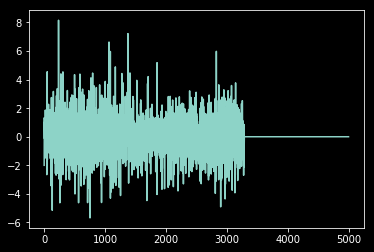

In [92]:
plt.plot(dset[400]['data'][0, ::10])

In [63]:
dset.toggle_split()
len(dset)

202

In [9]:
from sklearn.decomposition import PCA

In [10]:
e.shape

NameError: name 'e' is not defined

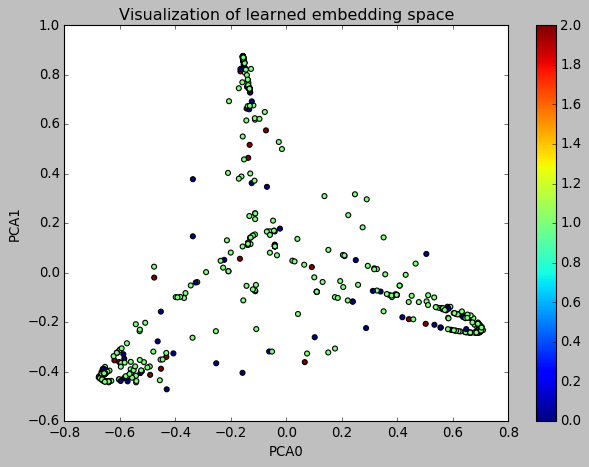

In [280]:
import pickle
with open("../pipelines/fully-connected-siamese/runs/run5/output.p", 'rb') as f:
    data = pickle.load(f)
t = np.vstack(data['labels'])
e = np.vstack(data['embeddings'])[:, 0, :]
pca = PCA(n_components=2)
pca.fit(e)
output = pca.transform(e)
colors = np.argmax(t, axis=-1)
plt.style.use('classic')
plt.scatter(output[:, 0], output[:, 1], c=colors)
plt.xlabel('PCA0')
plt.ylabel('PCA1')
plt.title('Visualization of learned embedding space')
plt.colorbar()
plt.tight_layout()
plt.show()

In [219]:
from networks import FullyConnected
from networks import utils
import torch

net = FullyConnected()
utils.show_model(net)

siamese_dset = dataset.SiameseDataset(dataset=dset)
input_tensor = torch.from_numpy(siamese_dset[0][0]).unsqueeze(0)
label_tensor = torch.from_numpy(siamese_dset[0][1]).unsqueeze(0)
(label_tensor[:, 0, :] * label_tensor[:, 1, :]).sum()

FullyConnected(
  (fc1): Sequential(
    (0): Linear(in_features=100000, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=20, bias=True)
    (5): ReLU()
  )
)
Number of parameters: 10001330


tensor(0., dtype=torch.float64)

In [222]:
torch.nn.modules.distance.PairwiseDistance

torch.nn.modules.distance.PairwiseDistance

In [221]:
input_tensor.shape

torch.Size([1, 2, 100000])

In [198]:
siamese_dset = dataset.SiameseDataset(dataset=dset)
siamese_dset[0][1].shape

(2, 3)

In [177]:
net(tensor)

tensor([[0.0000, 0.3947, 0.0000, 0.3268, 0.0000, 0.2715, 0.0000, 0.0000, 0.4240,
         0.0000, 0.0191, 0.4830, 0.0000, 0.3301, 0.0000, 0.3315, 0.1773, 0.0000,
         0.0000, 0.0000]], grad_fn=<DivBackward1>)

In [160]:
label_tensor

tensor([[0., 0., 1.]], dtype=torch.float64)

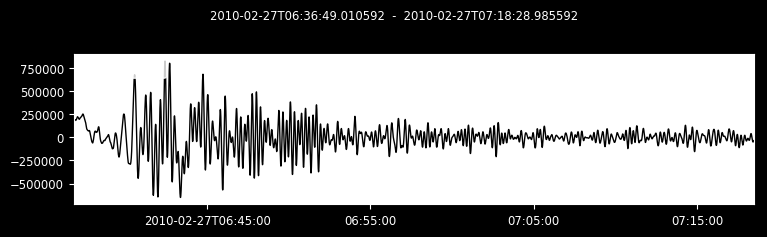

(None, 'positive')

In [137]:

x, y, = dset[1000]
sac.plot(), dset.labels[np.argmax(y)]

In [118]:
siamese_dset = dataset.SiameseDataset(dset)
x = siamese_dset[0]

In [120]:
x[0].shape

(2, 100000)

In [52]:
fname = '../data/prepared/AZ.MONP2.BHN.SAC_positive.p'
import pickle
with open(fname, 'rb') as f:
    earthquake = pickle.load(f)

In [29]:

earthquake['data'].detrend(type='demean')
earthquake['data'].plot()

NameError: name 'earthquake' is not defined

In [59]:
earthquake['data'].data

array([ 7107.3184,  6887.3184,  6666.3184, ..., 30202.318 , 30502.318 ,
       30800.318 ], dtype=float32)

In [29]:
earthquake[0].stats.sampling_rate

40.0

In [24]:
times, data, sample_rate = earthquake[0].times(), earthquake[0].data, earthquake[0].sr

AttributeError: 'Trace' object has no attribute 'sr'

In [22]:
times.shape, data.shape

((300001,), (300001,))